In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
netflix = pd.read_excel('Netflix_Titles.xlsx', sheet_name = 'Table1')

In [3]:
title = pd.DataFrame(data = netflix)

In [4]:
title.head()

,Show_ID,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,description
0,81145628,Movie,Norm of the North: King Sized Adventure,Richard Finn,Alan Marriott,United States,2019-09-09,2019,TV-PG,90 min,Children & Family Movies,Before planning an awesome wedding for his gra...
1,81145628,Movie,Norm of the North: King Sized Adventure,Tim Maltby,Alan Marriott,United States,2019-09-09,2019,TV-PG,90 min,Children & Family Movies,Before planning an awesome wedding for his gra...
2,81145628,Movie,Norm of the North: King Sized Adventure,Richard Finn,Alan Marriott,United States,2019-09-09,2019,TV-PG,90 min,Comedies,Before planning an awesome wedding for his gra...
3,81145628,Movie,Norm of the North: King Sized Adventure,Tim Maltby,Alan Marriott,United States,2019-09-09,2019,TV-PG,90 min,Comedies,Before planning an awesome wedding for his gra...
4,81145628,Movie,Norm of the North: King Sized Adventure,Richard Finn,Andrew Toth,United States,2019-09-09,2019,TV-PG,90 min,Children & Family Movies,Before planning an awesome wedding for his gra...


In [5]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139954 entries, 0 to 139953
Data columns (total 12 columns):
Show_ID         139954 non-null int64
Type            139954 non-null object
Title           139954 non-null object
Director        101043 non-null object
Cast            138466 non-null object
Country         134164 non-null object
Date_Added      139795 non-null datetime64[ns]
Release_Year    139954 non-null int64
Rating          139881 non-null object
Duration        139954 non-null object
Listed_In       139954 non-null object
description     139954 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 12.8+ MB


In [6]:
T_V2 = title[['Country', 'Show_ID']].groupby('Country').count().sort_values(by = 'Show_ID', ascending = False).reset_index()

In [7]:
T_V2

,Country,Show_ID
0,United States,41663
1,India,18205
2,United Kingdom,9428
3,Japan,6177
4,France,5688
...,...,...
108,Afghanistan,2
109,Uganda,1
110,Nicaragua,1
111,"United States,",1


In [8]:
s = T_V2.where(T_V2['Show_ID'] > 2600).dropna().sort_values(by = 'Show_ID', ascending = False)

In [9]:
title['Show_ID'] = title['Show_ID'].astype(int)

In [10]:
s

,Country,Show_ID
0,United States,41663.0
1,India,18205.0
2,United Kingdom,9428.0
3,Japan,6177.0
4,France,5688.0
5,Canada,5547.0
6,Spain,4103.0
7,South Korea,3532.0
8,Germany,2951.0
9,Mexico,2917.0


<Figure size 720x720 with 0 Axes>

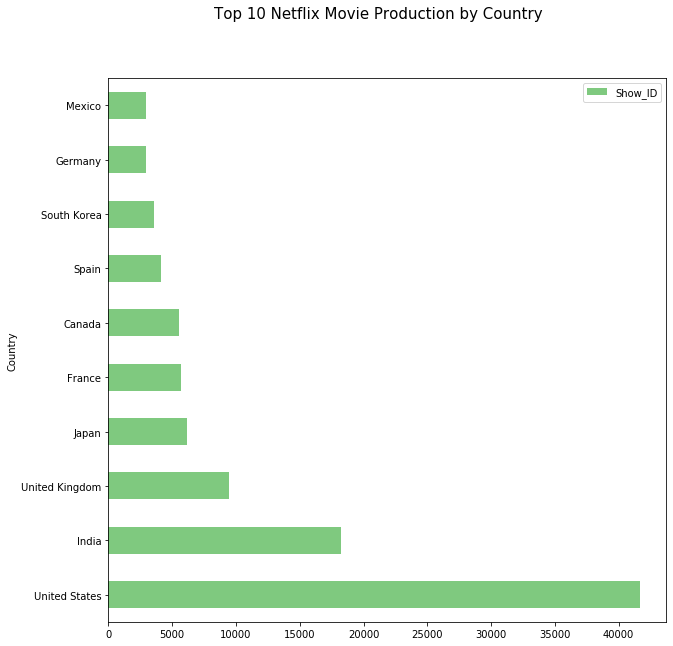

In [64]:
plt.figure(figsize = (10,10))
s.plot(kind = 'barh', x = 'Country', y = 'Show_ID', figsize = (10,10), colormap = 'Accent')
plt.suptitle('Top 10 Netflix Movie Production by Country', fontsize = 15)
bar.set_ylabel('Quantity of Films Produced')
bar.set_xlabel('Country')
plt.show()

In [12]:
Genre = title[['Listed_In', 'Show_ID']].groupby('Listed_In').count().reset_index()

In [13]:
Genre.where(Genre['Show_ID'] >= 120).dropna().sort_values(by = 'Show_ID', ascending = False)

,Listed_In,Show_ID
12,Dramas,19831.0
16,International Movies,19659.0
7,Comedies,13962.0
17,International TV Shows,8928.0
0,Action & Adventure,8331.0
15,Independent Movies,7146.0
34,TV Dramas,6587.0
4,Children & Family Movies,5874.0
41,Thrillers,4624.0
24,Romantic Movies,3883.0


In [14]:
title['Show_ID'] = title['Show_ID'].astype(int)

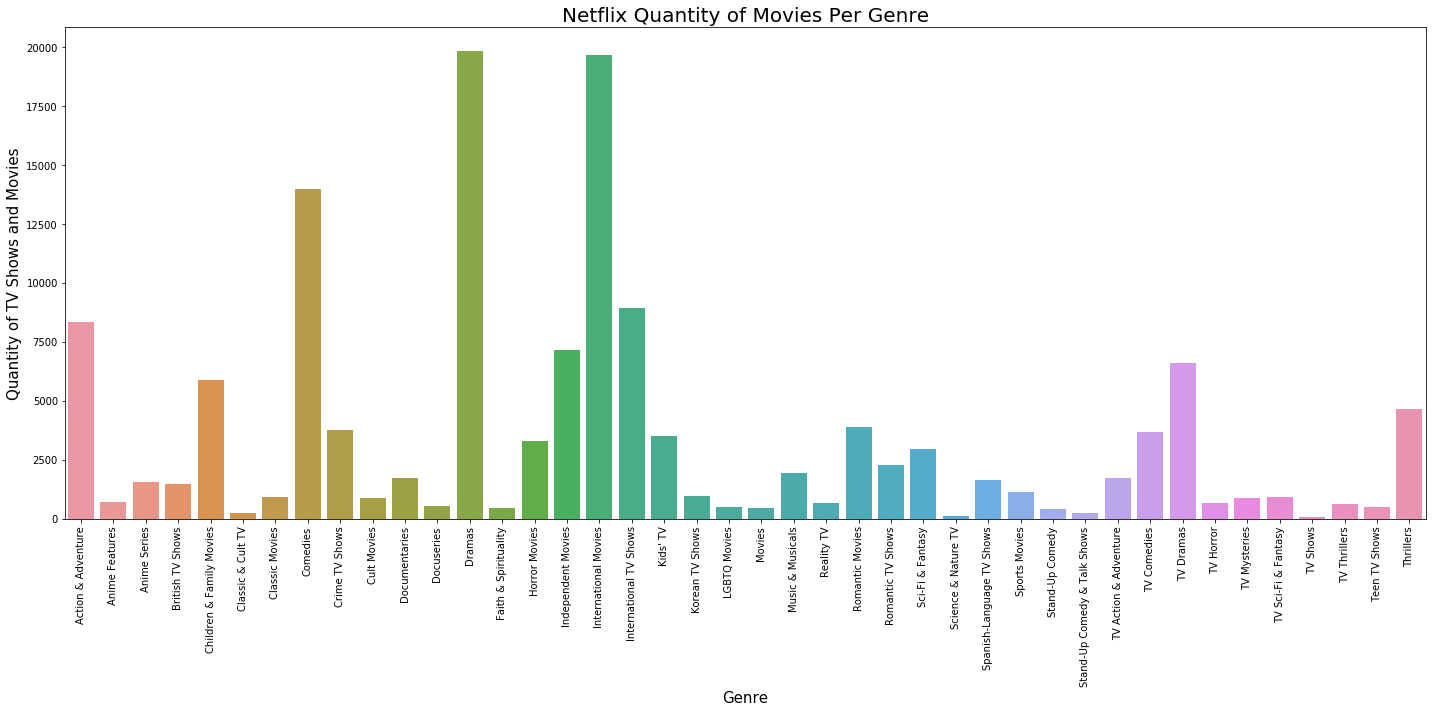

In [15]:
plt.figure(figsize = (20,10))
plt.title('Netflix Quantity of Movies Per Genre', size = 20)
g = sns.barplot(data = Genre, x = 'Listed_In', y = 'Show_ID')
g.set_ylabel('Quantity of TV Shows and Movies', size = 15)
g.set_xlabel('Genre', size = 15)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [16]:
rating = title[['Rating', 'Show_ID']].groupby('Rating').count()

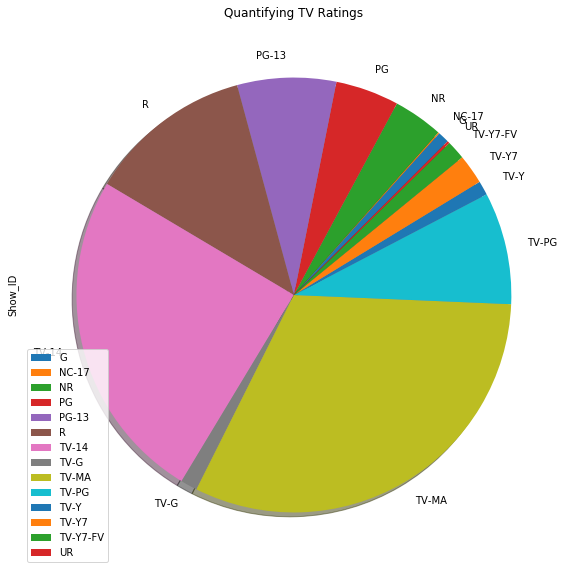

In [71]:
r = rating.plot(kind = 'pie', y = 'Show_ID', subplots = True, figsize = (10,10), shadow = True, startangle = 45)
plt.title('Quantifying TV Ratings')
plt.legend(loc = 'best')
plt.show()

In [34]:
Type = pd.pivot_table(title, values = 'Show_ID', index = ['Date_Added', 'Type'], aggfunc = len).reset_index()

In [35]:
Type

,Date_Added,Type,Show_ID
0,2008-01-01,Movie,18
1,2008-02-04,TV Show,1
2,2009-05-05,Movie,24
3,2009-11-18,Movie,6
4,2010-11-01,Movie,20
...,...,...,...
1726,2020-01-16,Movie,316
1727,2020-01-16,TV Show,64
1728,2020-01-17,Movie,14
1729,2020-01-17,TV Show,54


In [36]:
Type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 3 columns):
Date_Added    1731 non-null datetime64[ns]
Type          1731 non-null object
Show_ID       1731 non-null int32
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 33.9+ KB


In [37]:
Type.describe()

,Show_ID
count,1731.000000
mean,80.759676
std,178.984599
min,1.000000
25%,15.000000
50%,33.000000
75%,80.000000
max,3824.000000


In [38]:
Type.head()

,Date_Added,Type,Show_ID
0,2008-01-01,Movie,18
1,2008-02-04,TV Show,1
2,2009-05-05,Movie,24
3,2009-11-18,Movie,6
4,2010-11-01,Movie,20


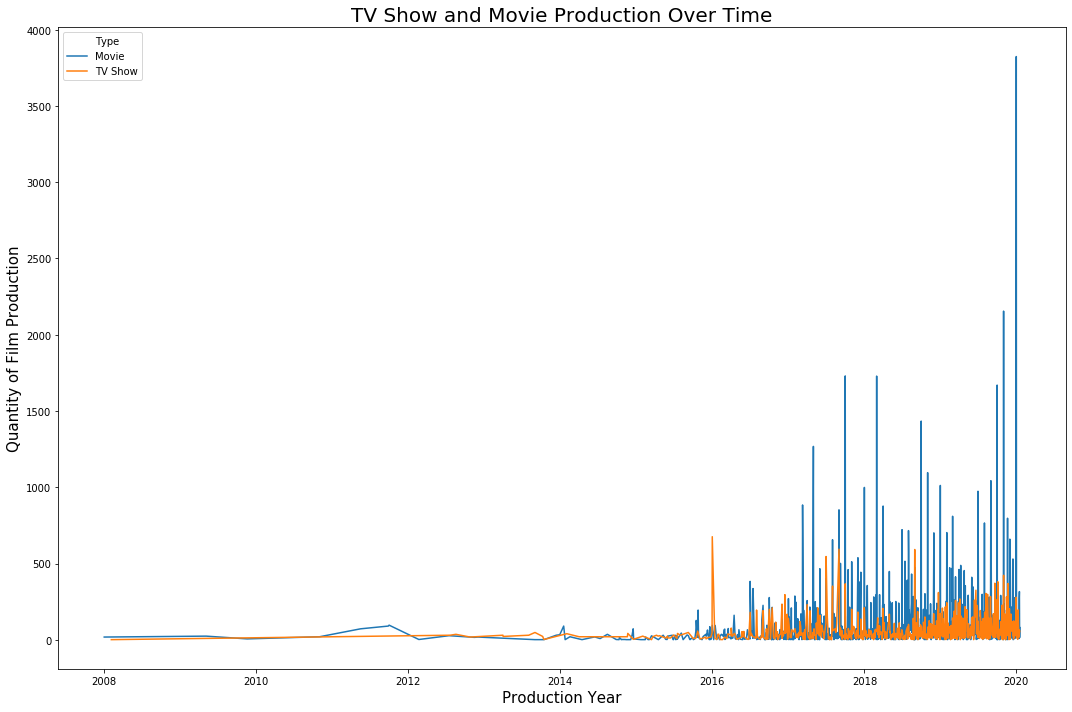

In [47]:
plt.figure(figsize = (15,10))
l = sns.lineplot(data = Type, hue = 'Type', x = 'Date_Added', y = 'Show_ID')
plt.title('TV Show and Movie Production Over Time', fontsize = 20)
l.set_ylabel('Quantity of Film Production', fontsize = 15)
l.set_xlabel('Production Year', fontsize = 15)
plt.tight_layout()
plt.show()

In [74]:
year = pd.pivot_table(title, values = 'Show_ID', index = ['Type', 'Release_Year'], aggfunc = len).reset_index()

In [75]:
year

,Type,Release_Year,Show_ID
0,Movie,1942,6
1,Movie,1943,5
2,Movie,1944,24
3,Movie,1945,12
4,Movie,1946,26
...,...,...,...
110,TV Show,2016,4107
111,TV Show,2017,5689
112,TV Show,2018,8900
113,TV Show,2019,10983


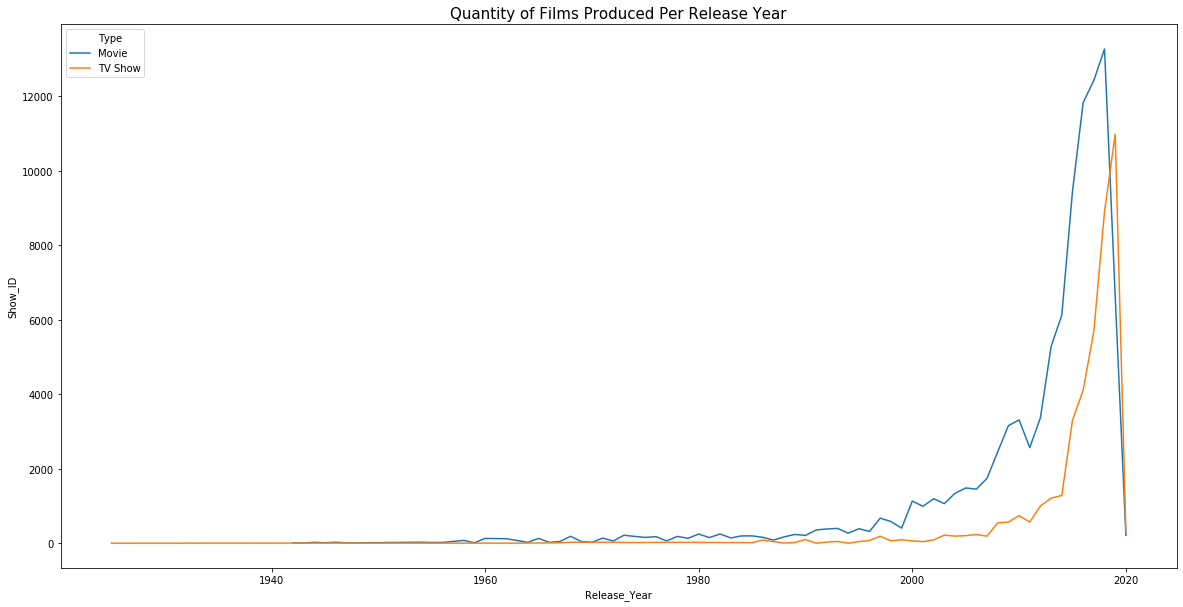

In [105]:
plt.figure(figsize = (20,10))
sns.lineplot(data = year, x = 'Release_Year', y = 'Show_ID', hue = 'Type')
plt.title('Quantity of Films Produced Per Release Year', fontsize = 15)
plt.show()